In [1]:
import numpy as np
import pandas as pd

In [2]:
airlines = pd.read_csv("airlines.csv")
airports = pd.read_csv("airports.csv")
train = pd.read_csv("flights_train.csv")
test = pd.read_csv("flights_test.csv")
submit_sample = pd.read_csv("submit_sample.csv")

In [3]:
#print(airlines.head(10))
#print(airports.head(10))
print(train.head(10))
#print(test.head(10))
#submit_sample.head(10)

   id  YEAR  MONTH  DAY  DAY_OF_WEEK AIRLINE  FLIGHT_NUMBER TAIL_NUMBER  \
0   0  2015      1    1            4      AS             98      N407AS   
1   1  2015      1    1            4      AA           2336      N3KUAA   
2   2  2015      1    1            4      US            840      N171US   
3   3  2015      1    1            4      AA            258      N3HYAA   
4   4  2015      1    1            4      AS            135      N527AS   
5   5  2015      1    1            4      DL            806      N3730B   
6   6  2015      1    1            4      NK            612      N635NK   
7   7  2015      1    1            4      US           2013      N584UW   
8   8  2015      1    1            4      AA           1112      N3LAAA   
9   9  2015      1    1            4      DL           1173      N826DN   

  ORIGIN_AIRPORT DESTINATION_AIRPORT  SCHEDULED_DEPARTURE  DEPARTURE_TIME  \
0            ANC                 SEA                    5          2354.0   
1            LAX    

In [4]:
airlines.describe(include='all')
airports.describe(include='all')
train.describe(include='all')

,id,YEAR,MONTH,DAY,DAY_OF_WEEK,AIRLINE,FLIGHT_NUMBER,TAIL_NUMBER,ORIGIN_AIRPORT,DESTINATION_AIRPORT,SCHEDULED_DEPARTURE,DEPARTURE_TIME,TAXI_OUT,WHEELS_OFF,SCHEDULED_TIME,DISTANCE,SCHEDULED_ARRIVAL,ARRIVAL_DELAY
count,2.818553e+06,2818553.0,2.818553e+06,2.818553e+06,2.818553e+06,2818553,2.818553e+06,2818553,2818553,2818553,2.818553e+06,2.818553e+06,2.818553e+06,2.818553e+06,2.818553e+06,2.818553e+06,2.818553e+06,2.818553e+06
unique,NaN,NaN,NaN,NaN,NaN,14,NaN,4688,322,322,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
top,NaN,NaN,NaN,NaN,NaN,WN,NaN,N477HA,ATL,ATL,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
freq,NaN,NaN,NaN,NaN,NaN,610684,NaN,2024,183656,183537,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
mean,1.409276e+06,2015.0,3.573126e+00,1.562678e+01,3.938906e+00,NaN,2.192953e+03,NaN,NaN,NaN,1.329533e+03,1.337376e+03,1.613164e+01,1.359705e+03,1.413717e+02,8.191704e+02,1.497113e+03,6.001171e+00
std,8.136463e+05,0.0,1.703931e+00,8.704137e+00,1.986157e+00,NaN,1.774639e+03,NaN,NaN,NaN,4.814211e+02,4.950658e+02,9.226391e+00,4.964894e+02,7.501261e+01,6.033737e+02,5.036512e+02,4.065076e+01
min,0.000000e+00,2015.0,1.000000e+00,1.000000e+00,1.000000e+00,NaN,1.000000e+00,NaN,NaN,NaN,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.800000e+01,3.100000e+01,1.000000e+00,-8.700000e+01
25%,7.046380e+05,2015.0,2.000000e+00,8.000000e+00,2.000000e+00,NaN,7.330000e+02,NaN,NaN,NaN,9.200000e+02,9.230000e+02,1.100000e+01,9.380000e+02,8.500000e+01,3.730000e+02,1.112000e+03,-1.300000e+01
50%,1.409276e+06,2015.0,4.000000e+00,1.600000e+01,4.000000e+00,NaN,1.673000e+03,NaN,NaN,NaN,1.325000e+03,1.331000e+03,1.400000e+01,1.344000e+03,1.230000e+02,6.490000e+02,1.521000e+03,-4.000000e+00
75%,2.113914e+06,2015.0,5.000000e+00,2.300000e+01,6.000000e+00,NaN,3.354000e+03,NaN,NaN,NaN,1.730000e+03,1.740000e+03,1.900000e+01,1.754000e+03,1.740000e+02,1.061000e+03,1.919000e+03,1.000000e+01


In [5]:
Q1 = train.ARRIVAL_DELAY.quantile(.25)
Q3 = train.ARRIVAL_DELAY.quantile(.75)
IQR = Q3 - Q1
LB = Q1 - 1.5*IQR # lower bound for data to not be considered as outliers
UB = Q3 + 1.5*IQR # upper bound
train_out = train[(train.ARRIVAL_DELAY > LB) & (train.ARRIVAL_DELAY < UB)]
train_out # training set without outliers

,id,YEAR,MONTH,DAY,DAY_OF_WEEK,AIRLINE,FLIGHT_NUMBER,TAIL_NUMBER,ORIGIN_AIRPORT,DESTINATION_AIRPORT,SCHEDULED_DEPARTURE,DEPARTURE_TIME,TAXI_OUT,WHEELS_OFF,SCHEDULED_TIME,DISTANCE,SCHEDULED_ARRIVAL,ARRIVAL_DELAY
0,0,2015,1,1,4,AS,98,N407AS,ANC,SEA,5,2354.0,21.0,15.0,205.0,1448,430,-22.0
1,1,2015,1,1,4,AA,2336,N3KUAA,LAX,PBI,10,2.0,12.0,14.0,280.0,2330,750,-9.0
2,2,2015,1,1,4,US,840,N171US,SFO,CLT,20,18.0,16.0,34.0,286.0,2296,806,5.0
3,3,2015,1,1,4,AA,258,N3HYAA,LAX,MIA,20,15.0,15.0,30.0,285.0,2342,805,-9.0
4,4,2015,1,1,4,AS,135,N527AS,SEA,ANC,25,24.0,11.0,35.0,235.0,1448,320,-21.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2818546,2818546,2015,6,30,2,F9,682,N918FR,DEN,MCO,2359,2355.0,10.0,5.0,214.0,1546,533,-27.0
2818547,2818547,2015,6,30,2,F9,300,N939FR,DEN,TPA,2359,2352.0,17.0,9.0,203.0,1506,522,-5.0
2818548,2818548,2015,6,30,2,UA,1180,N65832,LAX,ORD,2359,2358.0,11.0,9.0,241.0,1744,600,-8.0
2818551,2818551,2015,6,30,2,UA,1637,N35260,SEA,IAH,2359,12.0,12.0,24.0,250.0,1874,609,9.0


In [6]:
# create departure and scheduled departure times as minutes (from 0 to 1440)
dep = (train_out.DEPARTURE_TIME-train_out.DEPARTURE_TIME%100)*60/100 + train_out.DEPARTURE_TIME%100
sch = (train_out.SCHEDULED_DEPARTURE-train_out.SCHEDULED_DEPARTURE%100)*60/100 + train_out.SCHEDULED_DEPARTURE%100

# the difference 
dif = pd.DataFrame(dep - sch)
dif

,0
0,1429.0
1,-8.0
2,-2.0
3,-5.0
4,-1.0
...,...
2818546,-4.0
2818547,-7.0
2818548,-1.0
2818551,-1427.0


In [7]:
dif[abs(dif) < 720].describe(include='all')

,0
count,2.570459e+06
mean,1.914960e+00
std,1.206500e+01
min,-4.800000e+01
25%,-5.000000e+00
50%,-2.000000e+00
75%,4.000000e+00
max,1.330000e+02


In [8]:
abs(dif[abs(dif) > 720]).describe(include='all')

,0
count,2179.000000
mean,1416.391005
std,16.471486
min,1340.000000
25%,1405.000000
50%,1420.000000
75%,1430.000000
max,1438.000000


In [9]:
# we see that unless the scheduled and actual departure times differ by day, the min differnce is -48 and max is 133
# let's convert values above 720 minutes and add a DEPARTURE_DELAY column

def dep_del(dataset):
    dep = (dataset.DEPARTURE_TIME-dataset.DEPARTURE_TIME%100)*60/100 + dataset.DEPARTURE_TIME%100
    sch = (dataset.SCHEDULED_DEPARTURE-dataset.SCHEDULED_DEPARTURE%100)*60/100 + dataset.SCHEDULED_DEPARTURE%100

    # the difference 
    dif = pd.DataFrame(dep - sch)
    
    dif[abs(dif) > 720] = np.sign(dif[abs(dif) > 720])*(abs(dif[abs(dif) > 720]) - 1440)
    diff = dif.rename({0: 'DEPARTURE_DELAY'}, axis = 1)
    train_dep = dataset.join(diff)
    return train_dep

train_dep = dep_del(train_out)
train_dep

,id,YEAR,MONTH,DAY,DAY_OF_WEEK,AIRLINE,FLIGHT_NUMBER,TAIL_NUMBER,ORIGIN_AIRPORT,DESTINATION_AIRPORT,SCHEDULED_DEPARTURE,DEPARTURE_TIME,TAXI_OUT,WHEELS_OFF,SCHEDULED_TIME,DISTANCE,SCHEDULED_ARRIVAL,ARRIVAL_DELAY,DEPARTURE_DELAY
0,0,2015,1,1,4,AS,98,N407AS,ANC,SEA,5,2354.0,21.0,15.0,205.0,1448,430,-22.0,-11.0
1,1,2015,1,1,4,AA,2336,N3KUAA,LAX,PBI,10,2.0,12.0,14.0,280.0,2330,750,-9.0,-8.0
2,2,2015,1,1,4,US,840,N171US,SFO,CLT,20,18.0,16.0,34.0,286.0,2296,806,5.0,-2.0
3,3,2015,1,1,4,AA,258,N3HYAA,LAX,MIA,20,15.0,15.0,30.0,285.0,2342,805,-9.0,-5.0
4,4,2015,1,1,4,AS,135,N527AS,SEA,ANC,25,24.0,11.0,35.0,235.0,1448,320,-21.0,-1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2818546,2818546,2015,6,30,2,F9,682,N918FR,DEN,MCO,2359,2355.0,10.0,5.0,214.0,1546,533,-27.0,-4.0
2818547,2818547,2015,6,30,2,F9,300,N939FR,DEN,TPA,2359,2352.0,17.0,9.0,203.0,1506,522,-5.0,-7.0
2818548,2818548,2015,6,30,2,UA,1180,N65832,LAX,ORD,2359,2358.0,11.0,9.0,241.0,1744,600,-8.0,-1.0
2818551,2818551,2015,6,30,2,UA,1637,N35260,SEA,IAH,2359,12.0,12.0,24.0,250.0,1874,609,9.0,13.0


In [10]:
train_dep.iloc[:,-2:].corr()
# departure delay and arrival delay are apparently rather strongly correlated at 0.680

,ARRIVAL_DELAY,DEPARTURE_DELAY
ARRIVAL_DELAY,1.000000,0.679894
DEPARTURE_DELAY,0.679894,1.000000


In [11]:
# REMARK:
# We can maybe extend the outliers until the maximum difference between the scheduled and the actual departure for a
# flight in one day gets as close as possible to the minimum difference where the scheduled flight is on one day and
# the actual flight is on another

# But I'm not sure how we will know if the data we have is in one of them or the other

In [12]:
train_d = dep_del(train)
train_d

,id,YEAR,MONTH,DAY,DAY_OF_WEEK,AIRLINE,FLIGHT_NUMBER,TAIL_NUMBER,ORIGIN_AIRPORT,DESTINATION_AIRPORT,SCHEDULED_DEPARTURE,DEPARTURE_TIME,TAXI_OUT,WHEELS_OFF,SCHEDULED_TIME,DISTANCE,SCHEDULED_ARRIVAL,ARRIVAL_DELAY,DEPARTURE_DELAY
0,0,2015,1,1,4,AS,98,N407AS,ANC,SEA,5,2354.0,21.0,15.0,205.0,1448,430,-22.0,-11.0
1,1,2015,1,1,4,AA,2336,N3KUAA,LAX,PBI,10,2.0,12.0,14.0,280.0,2330,750,-9.0,-8.0
2,2,2015,1,1,4,US,840,N171US,SFO,CLT,20,18.0,16.0,34.0,286.0,2296,806,5.0,-2.0
3,3,2015,1,1,4,AA,258,N3HYAA,LAX,MIA,20,15.0,15.0,30.0,285.0,2342,805,-9.0,-5.0
4,4,2015,1,1,4,AS,135,N527AS,SEA,ANC,25,24.0,11.0,35.0,235.0,1448,320,-21.0,-1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2818548,2818548,2015,6,30,2,UA,1180,N65832,LAX,ORD,2359,2358.0,11.0,9.0,241.0,1744,600,-8.0,-1.0
2818549,2818549,2015,6,30,2,UA,1192,N69839,LAX,IAH,2359,129.0,11.0,140.0,201.0,1379,520,79.0,90.0
2818550,2818550,2015,6,30,2,UA,1480,N37298,PDX,IAH,2359,152.0,8.0,200.0,249.0,1825,608,107.0,113.0
2818551,2818551,2015,6,30,2,UA,1637,N35260,SEA,IAH,2359,12.0,12.0,24.0,250.0,1874,609,9.0,13.0


In [13]:
train_d.iloc[:,-2:].corr()

,ARRIVAL_DELAY,DEPARTURE_DELAY
ARRIVAL_DELAY,1.00000,0.82973
DEPARTURE_DELAY,0.82973,1.00000


In [14]:
test_d = dep_del(test)
test_d

,id,YEAR,MONTH,DAY,DAY_OF_WEEK,AIRLINE,FLIGHT_NUMBER,TAIL_NUMBER,ORIGIN_AIRPORT,DESTINATION_AIRPORT,SCHEDULED_DEPARTURE,DEPARTURE_TIME,TAXI_OUT,WHEELS_OFF,SCHEDULED_TIME,DISTANCE,SCHEDULED_ARRIVAL,DEPARTURE_DELAY
0,0,2015,7,1,3,NK,298,N624NK,LAS,IAH,3,41.0,11.0,52.0,177.0,1222,500,38.0
1,1,2015,7,1,3,AA,1965,N507AY,SFO,CLT,5,2400.0,21.0,21.0,303.0,2296,808,-5.0
2,2,2015,7,1,3,DL,2020,N3759,LAX,MEM,5,2400.0,36.0,36.0,223.0,1619,548,-5.0
3,3,2015,7,1,3,NK,612,N629NK,LAS,MSP,5,53.0,14.0,107.0,178.0,1299,503,48.0
4,4,2015,7,1,3,UA,1044,N39418,ANC,ORD,8,17.0,20.0,37.0,364.0,2846,912,9.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
514379,514379,2015,7,31,5,DL,919,N835DN,PDX,DTW,2359,2356.0,12.0,8.0,248.0,1953,707,-3.0
514380,514380,2015,7,31,5,DL,1846,N372DA,PDX,ATL,2359,12.0,10.0,22.0,274.0,2172,733,13.0
514381,514381,2015,7,31,5,F9,682,N922FR,DEN,MCO,2359,2355.0,14.0,9.0,213.0,1546,532,-4.0
514382,514382,2015,7,31,5,F9,300,N951FR,DEN,TPA,2359,4.0,16.0,20.0,204.0,1506,523,5.0


In [15]:
from sklearn.linear_model import LinearRegression

model = LinearRegression()

X = train_d["DEPARTURE_DELAY"].values
Y = train_d["ARRIVAL_DELAY"].values

model.fit(X[:, np.newaxis], Y)

xfit0 = test_d['DEPARTURE_DELAY'].values

yfit0 = model.predict(xfit0[:, np.newaxis])
yfit0

array([31.68050967, -7.83519   , -7.83519   , ..., -6.91622024,
        1.3545076 , -5.07828072])

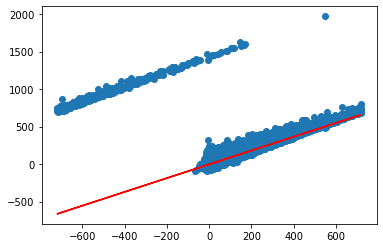

In [16]:
from matplotlib import pyplot as plt
plt.scatter(train_d.DEPARTURE_DELAY, train_d.ARRIVAL_DELAY)
plt.plot(xfit0, yfit0, c='r')

In [17]:
pd.DataFrame(yfit0, columns=['ARRIVAL_DELAY'])

,ARRIVAL_DELAY
0,31.680510
1,-7.835190
2,-7.835190
3,40.870207
4,5.030387
...,...
514379,-5.997250
514380,8.706266
514381,-6.916220
514382,1.354508


In [18]:
pd.DataFrame(yfit0, columns=['ARRIVAL_DELAY']).to_csv('submit_sample1.csv', index_label='id')

In [19]:
X = train_dep["DEPARTURE_DELAY"].values
Y = train_dep["ARRIVAL_DELAY"].values

model.fit(X[:, np.newaxis], Y)

xfit1 = test_d['DEPARTURE_DELAY'].values

yfit1 = model.predict(xfit1[:, np.newaxis])
yfit1

array([27.95520224, -9.1921433 , -9.1921433 , ..., -8.32825155,
       -0.55322573, -6.60046803])

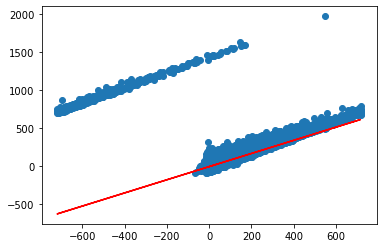

In [20]:
from matplotlib import pyplot as plt
plt.scatter(train_d.DEPARTURE_DELAY, train_d.ARRIVAL_DELAY)
plt.plot(xfit1, yfit1, c='r')

In [21]:
pd.DataFrame(yfit1, columns=['ARRIVAL_DELAY']).to_csv('submit_sample2.csv', index_label='id')

In [22]:
train[train.ARRIVAL_DELAY>1350]

,id,YEAR,MONTH,DAY,DAY_OF_WEEK,AIRLINE,FLIGHT_NUMBER,TAIL_NUMBER,ORIGIN_AIRPORT,DESTINATION_AIRPORT,SCHEDULED_DEPARTURE,DEPARTURE_TIME,TAXI_OUT,WHEELS_OFF,SCHEDULED_TIME,DISTANCE,SCHEDULED_ARRIVAL,ARRIVAL_DELAY
34456,34456,2015,1,3,6,AA,1677,N557AA,MEM,DFW,1010,910.0,21.0,931.0,100.0,432,1150,1384.0
150600,150600,2015,1,11,7,AA,1595,N469AA,AUS,DFW,650,700.0,14.0,714.0,65.0,190,755,1444.0
182695,182695,2015,1,13,2,AA,1487,N479AA,OMA,DFW,841,800.0,21.0,821.0,124.0,583,1045,1392.0
258405,258405,2015,1,18,7,AA,224,N5DGAA,LAS,LAX,1130,1414.0,16.0,1430.0,76.0,236,1246,1593.0
305007,305007,2015,1,21,3,AA,2385,N4XNAA,JAX,DFW,1223,1240.0,14.0,1254.0,172.0,918,1415,1452.0
331026,331026,2015,1,23,5,AA,1322,N598AA,BHM,DFW,700,1608.0,13.0,1621.0,134.0,597,914,1971.0
347728,347728,2015,1,24,6,AA,1301,N470AA,MSP,DFW,821,708.0,31.0,739.0,164.0,852,1105,1353.0
387354,387354,2015,1,27,2,AA,1242,N586AA,FAT,DFW,659,850.0,19.0,909.0,191.0,1313,1210,1546.0
502357,502357,2015,2,4,3,AA,2293,N5ELAA,SFO,DFW,1159,1044.0,15.0,1059.0,201.0,1464,1720,1371.0
564461,564461,2015,2,8,7,HA,50,N374HA,HNL,JFK,1630,1623.0,18.0,1641.0,565.0,4983,655,1391.0


In [23]:
train.ARRIVAL_DELAY.sort_values()

1420147     -87.0
1049837     -87.0
309817      -82.0
1783910     -81.0
542188      -79.0
            ...  
911947     1576.0
258405     1593.0
1232474    1598.0
853639     1627.0
331026     1971.0
Name: ARRIVAL_DELAY, Length: 2818553, dtype: float64

In [24]:
def dep_delay(dataset):
    dep = (dataset.DEPARTURE_TIME-dataset.DEPARTURE_TIME%100)*60/100 + dataset.DEPARTURE_TIME%100
    sch = (dataset.SCHEDULED_DEPARTURE-dataset.SCHEDULED_DEPARTURE%100)*60/100 + dataset.SCHEDULED_DEPARTURE%100

    # the difference 
    dif = pd.DataFrame(dep - sch)
    
    dif[abs(dif) > 720] = np.sign(dif[abs(dif) > 720])*(abs(dif[abs(dif) > 720]) - 1440)
    dif[dif < -90] = dif[dif < -90] + 1440
    diff = dif.rename({0: 'DEPARTURE_DELAY'}, axis = 1)
    train_dep = dataset.join(diff)
    return train_dep

train_delay = dep_delay(train)
train_delay

,id,YEAR,MONTH,DAY,DAY_OF_WEEK,AIRLINE,FLIGHT_NUMBER,TAIL_NUMBER,ORIGIN_AIRPORT,DESTINATION_AIRPORT,SCHEDULED_DEPARTURE,DEPARTURE_TIME,TAXI_OUT,WHEELS_OFF,SCHEDULED_TIME,DISTANCE,SCHEDULED_ARRIVAL,ARRIVAL_DELAY,DEPARTURE_DELAY
0,0,2015,1,1,4,AS,98,N407AS,ANC,SEA,5,2354.0,21.0,15.0,205.0,1448,430,-22.0,-11.0
1,1,2015,1,1,4,AA,2336,N3KUAA,LAX,PBI,10,2.0,12.0,14.0,280.0,2330,750,-9.0,-8.0
2,2,2015,1,1,4,US,840,N171US,SFO,CLT,20,18.0,16.0,34.0,286.0,2296,806,5.0,-2.0
3,3,2015,1,1,4,AA,258,N3HYAA,LAX,MIA,20,15.0,15.0,30.0,285.0,2342,805,-9.0,-5.0
4,4,2015,1,1,4,AS,135,N527AS,SEA,ANC,25,24.0,11.0,35.0,235.0,1448,320,-21.0,-1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2818548,2818548,2015,6,30,2,UA,1180,N65832,LAX,ORD,2359,2358.0,11.0,9.0,241.0,1744,600,-8.0,-1.0
2818549,2818549,2015,6,30,2,UA,1192,N69839,LAX,IAH,2359,129.0,11.0,140.0,201.0,1379,520,79.0,90.0
2818550,2818550,2015,6,30,2,UA,1480,N37298,PDX,IAH,2359,152.0,8.0,200.0,249.0,1825,608,107.0,113.0
2818551,2818551,2015,6,30,2,UA,1637,N35260,SEA,IAH,2359,12.0,12.0,24.0,250.0,1874,609,9.0,13.0


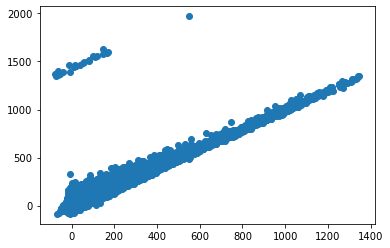

In [25]:
plt.scatter(train_delay.DEPARTURE_DELAY, train_delay.ARRIVAL_DELAY)

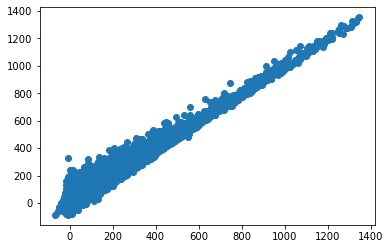

In [26]:
traindelay = train_delay[400 + train_delay.DEPARTURE_DELAY > train_delay.ARRIVAL_DELAY]
plt.scatter(traindelay.DEPARTURE_DELAY, traindelay.ARRIVAL_DELAY)

In [27]:
test_del = dep_delay(test)
test_del

,id,YEAR,MONTH,DAY,DAY_OF_WEEK,AIRLINE,FLIGHT_NUMBER,TAIL_NUMBER,ORIGIN_AIRPORT,DESTINATION_AIRPORT,SCHEDULED_DEPARTURE,DEPARTURE_TIME,TAXI_OUT,WHEELS_OFF,SCHEDULED_TIME,DISTANCE,SCHEDULED_ARRIVAL,DEPARTURE_DELAY
0,0,2015,7,1,3,NK,298,N624NK,LAS,IAH,3,41.0,11.0,52.0,177.0,1222,500,38.0
1,1,2015,7,1,3,AA,1965,N507AY,SFO,CLT,5,2400.0,21.0,21.0,303.0,2296,808,-5.0
2,2,2015,7,1,3,DL,2020,N3759,LAX,MEM,5,2400.0,36.0,36.0,223.0,1619,548,-5.0
3,3,2015,7,1,3,NK,612,N629NK,LAS,MSP,5,53.0,14.0,107.0,178.0,1299,503,48.0
4,4,2015,7,1,3,UA,1044,N39418,ANC,ORD,8,17.0,20.0,37.0,364.0,2846,912,9.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
514379,514379,2015,7,31,5,DL,919,N835DN,PDX,DTW,2359,2356.0,12.0,8.0,248.0,1953,707,-3.0
514380,514380,2015,7,31,5,DL,1846,N372DA,PDX,ATL,2359,12.0,10.0,22.0,274.0,2172,733,13.0
514381,514381,2015,7,31,5,F9,682,N922FR,DEN,MCO,2359,2355.0,14.0,9.0,213.0,1546,532,-4.0
514382,514382,2015,7,31,5,F9,300,N951FR,DEN,TPA,2359,4.0,16.0,20.0,204.0,1506,523,5.0


In [28]:
X = traindelay["DEPARTURE_DELAY"].values
Y = traindelay["ARRIVAL_DELAY"].values

model.fit(X[:, np.newaxis], Y)

xfit2 = test_del['DEPARTURE_DELAY'].values

yfit2 = model.predict(xfit2[:, np.newaxis])
yfit2

array([33.92804172, -9.41850665, -9.41850665, ..., -8.41044739,
        0.66208599, -6.39432886])

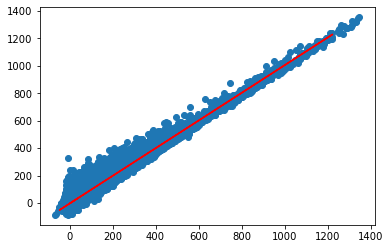

In [29]:
from matplotlib import pyplot as plt
plt.scatter(traindelay.DEPARTURE_DELAY, traindelay.ARRIVAL_DELAY)
plt.plot(xfit2, yfit2, c='r')

In [30]:
pd.DataFrame(yfit2, columns=['ARRIVAL_DELAY']).to_csv('submit_sample3.csv', index_label='id')

In [31]:
test_d.DEPARTURE_DELAY.sort_values()

112784   -719.0
281955   -705.0
196836   -703.0
63874    -700.0
65733    -696.0
          ...  
250403    704.0
254574    706.0
114320    706.0
513632    714.0
344705    716.0
Name: DEPARTURE_DELAY, Length: 514384, dtype: float64

In [32]:
test_del.DEPARTURE_DELAY.sort_values()

282680     -47.0
244146     -41.0
60493      -40.0
328349     -39.0
363954     -37.0
           ...  
68566     1075.0
272476    1125.0
119316    1170.0
136518    1176.0
453217    1223.0
Name: DEPARTURE_DELAY, Length: 514384, dtype: float64

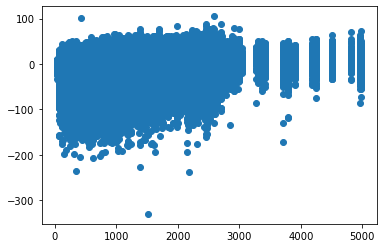

In [33]:
plt.scatter(traindelay.DISTANCE, traindelay.DEPARTURE_DELAY - traindelay.ARRIVAL_DELAY)

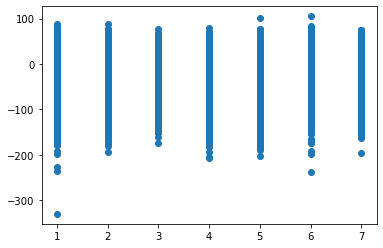

In [34]:
plt.scatter(traindelay.DAY_OF_WEEK, traindelay.DEPARTURE_DELAY - traindelay.ARRIVAL_DELAY)

In [35]:
traindelay.TAXI_OUT.sort_values()

729898       1.0
2465625      1.0
1872991      1.0
870439       1.0
2638813      1.0
           ...  
872388     180.0
846085     181.0
845346     185.0
2228244    200.0
846223     225.0
Name: TAXI_OUT, Length: 2818524, dtype: float64

In [36]:
def dep_whoff(dataset):
    dep = (dataset.WHEELS_OFF-dataset.WHEELS_OFF%100)*60/100 + dataset.WHEELS_OFF%100
    sch = (dataset.SCHEDULED_DEPARTURE-dataset.SCHEDULED_DEPARTURE%100)*60/100 + dataset.SCHEDULED_DEPARTURE%100

    # the difference 
    dif = pd.DataFrame(dep - sch)
    
    dif[abs(dif) > 720] = np.sign(dif[abs(dif) > 720])*(abs(dif[abs(dif) > 720]) - 1440)
    dif[dif < -90] = dif[dif < -90] + 1440
    diff = dif.rename({0: 'DEPARTURE_DELAY'}, axis = 1)
    train_dep = dataset.join(diff)
    return train_dep

train_whoff = dep_whoff(train)
train_whoff

,id,YEAR,MONTH,DAY,DAY_OF_WEEK,AIRLINE,FLIGHT_NUMBER,TAIL_NUMBER,ORIGIN_AIRPORT,DESTINATION_AIRPORT,SCHEDULED_DEPARTURE,DEPARTURE_TIME,TAXI_OUT,WHEELS_OFF,SCHEDULED_TIME,DISTANCE,SCHEDULED_ARRIVAL,ARRIVAL_DELAY,DEPARTURE_DELAY
0,0,2015,1,1,4,AS,98,N407AS,ANC,SEA,5,2354.0,21.0,15.0,205.0,1448,430,-22.0,10.0
1,1,2015,1,1,4,AA,2336,N3KUAA,LAX,PBI,10,2.0,12.0,14.0,280.0,2330,750,-9.0,4.0
2,2,2015,1,1,4,US,840,N171US,SFO,CLT,20,18.0,16.0,34.0,286.0,2296,806,5.0,14.0
3,3,2015,1,1,4,AA,258,N3HYAA,LAX,MIA,20,15.0,15.0,30.0,285.0,2342,805,-9.0,10.0
4,4,2015,1,1,4,AS,135,N527AS,SEA,ANC,25,24.0,11.0,35.0,235.0,1448,320,-21.0,10.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2818548,2818548,2015,6,30,2,UA,1180,N65832,LAX,ORD,2359,2358.0,11.0,9.0,241.0,1744,600,-8.0,10.0
2818549,2818549,2015,6,30,2,UA,1192,N69839,LAX,IAH,2359,129.0,11.0,140.0,201.0,1379,520,79.0,101.0
2818550,2818550,2015,6,30,2,UA,1480,N37298,PDX,IAH,2359,152.0,8.0,200.0,249.0,1825,608,107.0,121.0
2818551,2818551,2015,6,30,2,UA,1637,N35260,SEA,IAH,2359,12.0,12.0,24.0,250.0,1874,609,9.0,25.0


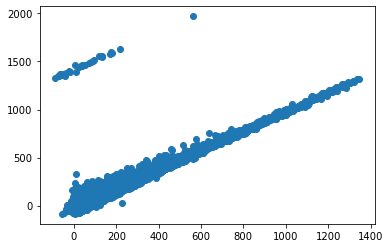

In [37]:
plt.scatter(train_whoff.DEPARTURE_DELAY, train_whoff.ARRIVAL_DELAY)

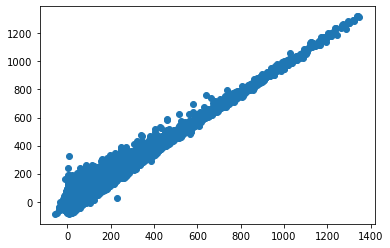

In [38]:
trainwhoff = train_whoff[400 + train_whoff.DEPARTURE_DELAY > train_whoff.ARRIVAL_DELAY]
plt.scatter(trainwhoff.DEPARTURE_DELAY, trainwhoff.ARRIVAL_DELAY)

In [39]:
test_w = dep_whoff(test)
test_w

,id,YEAR,MONTH,DAY,DAY_OF_WEEK,AIRLINE,FLIGHT_NUMBER,TAIL_NUMBER,ORIGIN_AIRPORT,DESTINATION_AIRPORT,SCHEDULED_DEPARTURE,DEPARTURE_TIME,TAXI_OUT,WHEELS_OFF,SCHEDULED_TIME,DISTANCE,SCHEDULED_ARRIVAL,DEPARTURE_DELAY
0,0,2015,7,1,3,NK,298,N624NK,LAS,IAH,3,41.0,11.0,52.0,177.0,1222,500,49.0
1,1,2015,7,1,3,AA,1965,N507AY,SFO,CLT,5,2400.0,21.0,21.0,303.0,2296,808,16.0
2,2,2015,7,1,3,DL,2020,N3759,LAX,MEM,5,2400.0,36.0,36.0,223.0,1619,548,31.0
3,3,2015,7,1,3,NK,612,N629NK,LAS,MSP,5,53.0,14.0,107.0,178.0,1299,503,62.0
4,4,2015,7,1,3,UA,1044,N39418,ANC,ORD,8,17.0,20.0,37.0,364.0,2846,912,29.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
514379,514379,2015,7,31,5,DL,919,N835DN,PDX,DTW,2359,2356.0,12.0,8.0,248.0,1953,707,9.0
514380,514380,2015,7,31,5,DL,1846,N372DA,PDX,ATL,2359,12.0,10.0,22.0,274.0,2172,733,23.0
514381,514381,2015,7,31,5,F9,682,N922FR,DEN,MCO,2359,2355.0,14.0,9.0,213.0,1546,532,10.0
514382,514382,2015,7,31,5,F9,300,N951FR,DEN,TPA,2359,4.0,16.0,20.0,204.0,1506,523,21.0


In [40]:
X = trainwhoff["DEPARTURE_DELAY"].values
Y = trainwhoff["ARRIVAL_DELAY"].values

model.fit(X[:, np.newaxis], Y)

xfit3 = test_w['DEPARTURE_DELAY'].values

yfit3 = model.predict(xfit3[:, np.newaxis])
yfit3

array([ 28.12780661,  -4.2217388 ,  10.48260002, ..., -10.10347434,
         0.67970747,  -1.28087104])

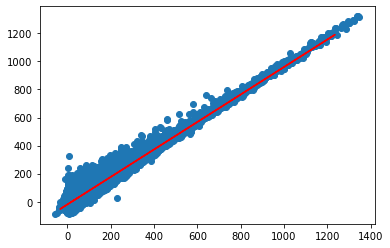

In [41]:
plt.scatter(trainwhoff.DEPARTURE_DELAY, trainwhoff.ARRIVAL_DELAY)
plt.plot(xfit3, yfit3, c='r')

In [42]:
pd.DataFrame(yfit3, columns=['ARRIVAL_DELAY']).to_csv('submit_sample4.csv', index_label='id')

In [43]:
from sklearn.svm import LinearSVR
from sklearn.pipeline import make_pipeline
from sklearn.preprocessing import StandardScaler

X = trainwhoff["DEPARTURE_DELAY"].values
Y = trainwhoff["ARRIVAL_DELAY"].values

regr = make_pipeline(StandardScaler(), LinearSVR(random_state=0, tol=1e-5))
regr.fit(X[:, np.newaxis], Y)

xfit4 = test_w['DEPARTURE_DELAY'].values

yfit4 = regr.predict(xfit4[:, np.newaxis])
yfit4

array([28.12616112, -4.07281991, 10.56308056, ..., -9.92718009,
        0.80581358, -1.14563981])

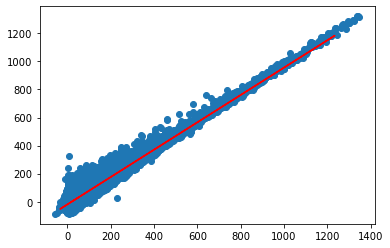

In [44]:
plt.scatter(trainwhoff.DEPARTURE_DELAY, trainwhoff.ARRIVAL_DELAY)
plt.plot(xfit4, yfit4, c='r')

In [45]:
pd.DataFrame(yfit4, columns=['ARRIVAL_DELAY']).to_csv('submit_sample5.csv', index_label='id')

In [46]:
#trainwhoff['DATE'] = pd.to_datetime(trainwhoff[['YEAR','MONTH', 'DAY']])
trainwhoff

,id,YEAR,MONTH,DAY,DAY_OF_WEEK,AIRLINE,FLIGHT_NUMBER,TAIL_NUMBER,ORIGIN_AIRPORT,DESTINATION_AIRPORT,SCHEDULED_DEPARTURE,DEPARTURE_TIME,TAXI_OUT,WHEELS_OFF,SCHEDULED_TIME,DISTANCE,SCHEDULED_ARRIVAL,ARRIVAL_DELAY,DEPARTURE_DELAY
0,0,2015,1,1,4,AS,98,N407AS,ANC,SEA,5,2354.0,21.0,15.0,205.0,1448,430,-22.0,10.0
1,1,2015,1,1,4,AA,2336,N3KUAA,LAX,PBI,10,2.0,12.0,14.0,280.0,2330,750,-9.0,4.0
2,2,2015,1,1,4,US,840,N171US,SFO,CLT,20,18.0,16.0,34.0,286.0,2296,806,5.0,14.0
3,3,2015,1,1,4,AA,258,N3HYAA,LAX,MIA,20,15.0,15.0,30.0,285.0,2342,805,-9.0,10.0
4,4,2015,1,1,4,AS,135,N527AS,SEA,ANC,25,24.0,11.0,35.0,235.0,1448,320,-21.0,10.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2818548,2818548,2015,6,30,2,UA,1180,N65832,LAX,ORD,2359,2358.0,11.0,9.0,241.0,1744,600,-8.0,10.0
2818549,2818549,2015,6,30,2,UA,1192,N69839,LAX,IAH,2359,129.0,11.0,140.0,201.0,1379,520,79.0,101.0
2818550,2818550,2015,6,30,2,UA,1480,N37298,PDX,IAH,2359,152.0,8.0,200.0,249.0,1825,608,107.0,121.0
2818551,2818551,2015,6,30,2,UA,1637,N35260,SEA,IAH,2359,12.0,12.0,24.0,250.0,1874,609,9.0,25.0


In [47]:
X = trainwhoff[['DEPARTURE_DELAY','DISTANCE']].values
Y = trainwhoff["ARRIVAL_DELAY"].values

model.fit(X, Y)

xfit5 = test_w[['DEPARTURE_DELAY','DISTANCE']].values

yfit5 = model.predict(xfit5)
yfit5

array([ 26.56695854, -10.15328381,   7.2931123 , ..., -13.04807932,
        -2.0801739 ,  -3.35714875])

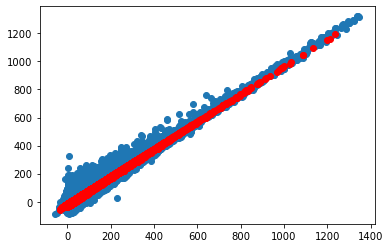

In [48]:
plt.scatter(trainwhoff.DEPARTURE_DELAY, trainwhoff.ARRIVAL_DELAY)
plt.scatter(test_w['DEPARTURE_DELAY'], yfit5, c='r')

In [49]:
pd.DataFrame(yfit5, columns=['ARRIVAL_DELAY']).to_csv('submit_sample6.csv', index_label='id')

In [50]:
X = trainwhoff[['DEPARTURE_DELAY','DISTANCE', 'DAY_OF_WEEK']].values
Y = trainwhoff["ARRIVAL_DELAY"].values

model.fit(X, Y)

xfit6 = test_w[['DEPARTURE_DELAY','DISTANCE', 'DAY_OF_WEEK']].values

yfit6 = model.predict(xfit6)
yfit6

array([ 26.57185489, -10.14790197,   7.29821747, ..., -13.05330847,
        -2.08547058,  -3.36248632])

In [51]:
pd.DataFrame(yfit6, columns=['ARRIVAL_DELAY']).to_csv('submit_sample7.csv', index_label='id')

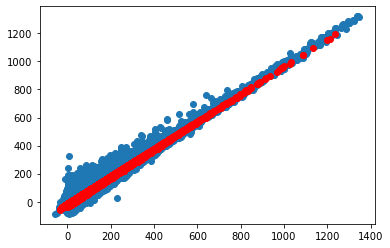

In [52]:
plt.scatter(trainwhoff.DEPARTURE_DELAY, trainwhoff.ARRIVAL_DELAY)
plt.scatter(test_w['DEPARTURE_DELAY'], yfit6, c='r')

In [53]:
trainwhoff['PATH'] = trainwhoff.ORIGIN_AIRPORT + ' - ' + trainwhoff.DESTINATION_AIRPORT
test_w['PATH'] = test_w.ORIGIN_AIRPORT + ' - ' + test_w.DESTINATION_AIRPORT
train_airline = trainwhoff.sort_values(by = 'AIRLINE').set_index('AIRLINE')
train_airline

<ipython-input-53-647dfba3ded8>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  trainwhoff['PATH'] = trainwhoff.ORIGIN_AIRPORT + ' - ' + trainwhoff.DESTINATION_AIRPORT


,id,YEAR,MONTH,DAY,DAY_OF_WEEK,FLIGHT_NUMBER,TAIL_NUMBER,ORIGIN_AIRPORT,DESTINATION_AIRPORT,SCHEDULED_DEPARTURE,DEPARTURE_TIME,TAXI_OUT,WHEELS_OFF,SCHEDULED_TIME,DISTANCE,SCHEDULED_ARRIVAL,ARRIVAL_DELAY,DEPARTURE_DELAY,PATH
AIRLINE,,,,,,,,,,,,,,,,,,,
AA,1409283,2015,4,4,6,1541,N5ENAA,BOS,MIA,750,745.0,44.0,829.0,210.0,1258,1120,10.0,39.0,BOS - MIA
AA,1260745,2015,3,26,4,269,N491AA,SJC,DFW,628,626.0,11.0,637.0,212.0,1438,1200,-2.0,9.0,SJC - DFW
AA,1260680,2015,3,26,4,1630,N3JYAA,DFW,FLL,625,620.0,13.0,633.0,157.0,1119,1002,2.0,8.0,DFW - FLL
AA,1260679,2015,3,26,4,1343,N3HTAA,DFW,CLT,625,636.0,17.0,653.0,138.0,936,943,16.0,28.0,DFW - CLT
AA,1260678,2015,3,26,4,1126,N4XUAA,SMF,DFW,625,621.0,14.0,635.0,204.0,1431,1149,-2.0,10.0,SMF - DFW
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
WN,2240132,2015,5,26,2,1007,N8658A,PHX,DEN,1435,1437.0,6.0,1443.0,115.0,602,1730,-18.0,8.0,PHX - DEN
WN,2240133,2015,5,26,2,1011,N7711N,ALB,BWI,1435,1557.0,8.0,1605.0,80.0,289,1555,65.0,90.0,ALB - BWI
WN,1224016,2015,3,23,1,596,N749SW,MCO,MCI,1900,1900.0,15.0,1915.0,185.0,1072,2105,-3.0,15.0,MCO - MCI


In [54]:
a = trainwhoff.sort_values(by = ['PATH']).set_index(['PATH'])
a

,id,YEAR,MONTH,DAY,DAY_OF_WEEK,AIRLINE,FLIGHT_NUMBER,TAIL_NUMBER,ORIGIN_AIRPORT,DESTINATION_AIRPORT,SCHEDULED_DEPARTURE,DEPARTURE_TIME,TAXI_OUT,WHEELS_OFF,SCHEDULED_TIME,DISTANCE,SCHEDULED_ARRIVAL,ARRIVAL_DELAY,DEPARTURE_DELAY
PATH,,,,,,,,,,,,,,,,,,,
ABE - ATL,2316292,2015,5,31,7,EV,5041,N868AS,ABE,ATL,1202,1338.0,13.0,1351.0,126.0,692,1408,125.0,109.0
ABE - ATL,2762459,2015,6,27,6,EV,4940,N861AS,ABE,ATL,1400,1416.0,13.0,1429.0,125.0,692,1605,19.0,29.0
ABE - ATL,1358235,2015,4,1,3,DL,2561,N987AT,ABE,ATL,640,639.0,10.0,649.0,128.0,692,848,-9.0,9.0
ABE - ATL,2032811,2015,5,13,3,EV,5041,N882AS,ABE,ATL,1202,1153.0,12.0,1205.0,126.0,692,1408,-18.0,3.0
ABE - ATL,724837,2015,2,19,4,EV,5041,N981EV,ABE,ATL,1200,1155.0,9.0,1204.0,140.0,692,1420,-22.0,4.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
YUM - PHX,1421629,2015,4,5,7,OO,2782,N496CA,YUM,PHX,700,656.0,10.0,706.0,56.0,160,756,-16.0,6.0
YUM - PHX,873477,2015,3,1,7,OO,2710,N821AS,YUM,PHX,1605,1604.0,12.0,1616.0,53.0,160,1658,-3.0,11.0
YUM - PHX,1261405,2015,3,26,4,OO,2798,N885AS,YUM,PHX,700,654.0,6.0,700.0,51.0,160,751,-15.0,0.0


In [55]:
b = test_w.sort_values(by = ['PATH']).set_index(['PATH'])
b

,id,YEAR,MONTH,DAY,DAY_OF_WEEK,AIRLINE,FLIGHT_NUMBER,TAIL_NUMBER,ORIGIN_AIRPORT,DESTINATION_AIRPORT,SCHEDULED_DEPARTURE,DEPARTURE_TIME,TAXI_OUT,WHEELS_OFF,SCHEDULED_TIME,DISTANCE,SCHEDULED_ARRIVAL,DEPARTURE_DELAY
PATH,,,,,,,,,,,,,,,,,,
ABE - ATL,157291,2015,7,10,5,EV,5008,N914EV,ABE,ATL,1610,1731.0,10.0,1741.0,131.0,692,1821,91.0
ABE - ATL,6970,2015,7,1,3,EV,5033,N850AS,ABE,ATL,1200,1158.0,13.0,1211.0,128.0,692,1408,11.0
ABE - ATL,28035,2015,7,2,4,EV,5008,N855AS,ABE,ATL,1610,1722.0,9.0,1731.0,131.0,692,1821,81.0
ABE - ATL,457199,2015,7,28,2,EV,5008,N914EV,ABE,ATL,1610,1607.0,11.0,1618.0,131.0,692,1821,8.0
ABE - ATL,491401,2015,7,30,4,EV,5008,N933EV,ABE,ATL,1610,1609.0,10.0,1619.0,131.0,692,1821,9.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
YUM - PHX,9950,2015,7,1,3,OO,2761,N907SW,YUM,PHX,1505,1459.0,10.0,1509.0,54.0,160,1559,4.0
YUM - PHX,368300,2015,7,23,4,OO,3004,N889AS,YUM,PHX,1030,1013.0,26.0,1039.0,54.0,160,1124,9.0
YUM - PHX,313165,2015,7,20,1,OO,2974,N468CA,YUM,PHX,700,649.0,14.0,703.0,55.0,160,755,3.0


In [56]:
b=list(dict.fromkeys(list(b.index)))
c=list(dict.fromkeys(list(a.index)))
for a in b:
    if a not in c:
        print(a)

ANC - EWR
BIL - ORD
DEN - OTH
EWR - ANC
EWR - TVC
IAD - SAT
MSO - SFO
OKC - SEA
ORD - BIL
OTH - DEN
PDX - STL
RST - CLE
SAT - IAD
SEA - OKC
SFO - MSO
STL - PDX
TVC - EWR


In [57]:
airline = airlines.IATA_CODE.sort_values().values

In [58]:
for l in airline:
    train_airline.loc[l, 'AL_DELAY_MEAN'] = train_airline.loc[l, 'DEPARTURE_DELAY'].mean()
train_airline

,id,YEAR,MONTH,DAY,DAY_OF_WEEK,FLIGHT_NUMBER,TAIL_NUMBER,ORIGIN_AIRPORT,DESTINATION_AIRPORT,SCHEDULED_DEPARTURE,DEPARTURE_TIME,TAXI_OUT,WHEELS_OFF,SCHEDULED_TIME,DISTANCE,SCHEDULED_ARRIVAL,ARRIVAL_DELAY,DEPARTURE_DELAY,PATH,AL_DELAY_MEAN
AIRLINE,,,,,,,,,,,,,,,,,,,,
AA,1409283,2015,4,4,6,1541,N5ENAA,BOS,MIA,750,745.0,44.0,829.0,210.0,1258,1120,10.0,39.0,BOS - MIA,28.47603
AA,1260745,2015,3,26,4,269,N491AA,SJC,DFW,628,626.0,11.0,637.0,212.0,1438,1200,-2.0,9.0,SJC - DFW,28.47603
AA,1260680,2015,3,26,4,1630,N3JYAA,DFW,FLL,625,620.0,13.0,633.0,157.0,1119,1002,2.0,8.0,DFW - FLL,28.47603
AA,1260679,2015,3,26,4,1343,N3HTAA,DFW,CLT,625,636.0,17.0,653.0,138.0,936,943,16.0,28.0,DFW - CLT,28.47603
AA,1260678,2015,3,26,4,1126,N4XUAA,SMF,DFW,625,621.0,14.0,635.0,204.0,1431,1149,-2.0,10.0,SMF - DFW,28.47603
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
WN,2240132,2015,5,26,2,1007,N8658A,PHX,DEN,1435,1437.0,6.0,1443.0,115.0,602,1730,-18.0,8.0,PHX - DEN,22.99964
WN,2240133,2015,5,26,2,1011,N7711N,ALB,BWI,1435,1557.0,8.0,1605.0,80.0,289,1555,65.0,90.0,ALB - BWI,22.99964
WN,1224016,2015,3,23,1,596,N749SW,MCO,MCI,1900,1900.0,15.0,1915.0,185.0,1072,2105,-3.0,15.0,MCO - MCI,22.99964


In [59]:
train_or = train_airline.sort_values(by = 'ORIGIN_AIRPORT').reset_index().set_index('ORIGIN_AIRPORT')
train_or

,AIRLINE,id,YEAR,MONTH,DAY,DAY_OF_WEEK,FLIGHT_NUMBER,TAIL_NUMBER,DESTINATION_AIRPORT,SCHEDULED_DEPARTURE,DEPARTURE_TIME,TAXI_OUT,WHEELS_OFF,SCHEDULED_TIME,DISTANCE,SCHEDULED_ARRIVAL,ARRIVAL_DELAY,DEPARTURE_DELAY,PATH,AL_DELAY_MEAN
ORIGIN_AIRPORT,,,,,,,,,,,,,,,,,,,,
ABE,EV,1714410,2015,4,23,4,5041,N872AS,ATL,1200,1156.0,7.0,1203.0,128.0,692,1408,-15.0,3.0,ABE - ATL,26.972867
ABE,EV,1407336,2015,4,4,6,6021,N16981,ORD,600,554.0,10.0,604.0,140.0,654,720,-13.0,4.0,ABE - ORD,26.972867
ABE,EV,2508241,2015,6,12,5,5251,N981EV,DTW,600,555.0,9.0,604.0,100.0,425,740,-16.0,4.0,ABE - DTW,26.972867
ABE,EV,1911147,2015,5,5,2,6144,N14923,ORD,1738,1831.0,13.0,1844.0,130.0,654,1848,56.0,66.0,ABE - ORD,26.972867
ABE,EV,1570491,2015,4,14,2,5041,N848AS,ATL,1200,1156.0,13.0,1209.0,128.0,692,1408,4.0,9.0,ABE - ATL,26.972867
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
YUM,OO,1758856,2015,4,26,7,2792,N885AS,PHX,1030,1021.0,17.0,1038.0,53.0,160,1123,3.0,8.0,YUM - PHX,26.014143
YUM,OO,1829267,2015,4,30,4,2747,N944SW,PHX,1505,1448.0,15.0,1503.0,53.0,160,1558,-8.0,-2.0,YUM - PHX,26.014143
YUM,OO,231899,2015,1,16,5,2740,N944SW,PHX,1130,1120.0,10.0,1130.0,52.0,160,1222,-15.0,0.0,YUM - PHX,26.014143


In [60]:
airport = airports.IATA_CODE.sort_values().values
airport

array(['ABE', 'ABI', 'ABQ', 'ABR', 'ABY', 'ACK', 'ACT', 'ACV', 'ACY',
       'ADK', 'ADQ', 'AEX', 'AGS', 'AKN', 'ALB', 'ALO', 'AMA', 'ANC',
       'APN', 'ASE', 'ATL', 'ATW', 'AUS', 'AVL', 'AVP', 'AZO', 'BDL',
       'BET', 'BFL', 'BGM', 'BGR', 'BHM', 'BIL', 'BIS', 'BJI', 'BLI',
       'BMI', 'BNA', 'BOI', 'BOS', 'BPT', 'BQK', 'BQN', 'BRD', 'BRO',
       'BRW', 'BTM', 'BTR', 'BTV', 'BUF', 'BUR', 'BWI', 'BZN', 'CAE',
       'CAK', 'CDC', 'CDV', 'CEC', 'CHA', 'CHO', 'CHS', 'CID', 'CIU',
       'CLD', 'CLE', 'CLL', 'CLT', 'CMH', 'CMI', 'CMX', 'CNY', 'COD',
       'COS', 'COU', 'CPR', 'CRP', 'CRW', 'CSG', 'CVG', 'CWA', 'DAB',
       'DAL', 'DAY', 'DBQ', 'DCA', 'DEN', 'DFW', 'DHN', 'DIK', 'DLG',
       'DLH', 'DRO', 'DSM', 'DTW', 'DVL', 'EAU', 'ECP', 'EGE', 'EKO',
       'ELM', 'ELP', 'ERI', 'ESC', 'EUG', 'EVV', 'EWN', 'EWR', 'EYW',
       'FAI', 'FAR', 'FAT', 'FAY', 'FCA', 'FLG', 'FLL', 'FNT', 'FSD',
       'FSM', 'FWA', 'GCC', 'GCK', 'GEG', 'GFK', 'GGG', 'GJT', 'GNV',
       'GPT', 'GRB',

In [61]:
for a in airport:
    train_or.loc[a, 'OR_DELAY_MEAN'] = train_or.loc[a, 'DEPARTURE_DELAY'].mean()
train_or

,AIRLINE,id,YEAR,MONTH,DAY,DAY_OF_WEEK,FLIGHT_NUMBER,TAIL_NUMBER,DESTINATION_AIRPORT,SCHEDULED_DEPARTURE,...,TAXI_OUT,WHEELS_OFF,SCHEDULED_TIME,DISTANCE,SCHEDULED_ARRIVAL,ARRIVAL_DELAY,DEPARTURE_DELAY,PATH,AL_DELAY_MEAN,OR_DELAY_MEAN
ORIGIN_AIRPORT,,,,,,,,,,,,,,,,,,,,,
ABE,EV,1714410,2015,4,23,4,5041,N872AS,ATL,1200,...,7.0,1203.0,128.0,692,1408,-15.0,3.0,ABE - ATL,26.972867,23.697774
ABE,EV,1407336,2015,4,4,6,6021,N16981,ORD,600,...,10.0,604.0,140.0,654,720,-13.0,4.0,ABE - ORD,26.972867,23.697774
ABE,EV,2508241,2015,6,12,5,5251,N981EV,DTW,600,...,9.0,604.0,100.0,425,740,-16.0,4.0,ABE - DTW,26.972867,23.697774
ABE,EV,1911147,2015,5,5,2,6144,N14923,ORD,1738,...,13.0,1844.0,130.0,654,1848,56.0,66.0,ABE - ORD,26.972867,23.697774
ABE,EV,1570491,2015,4,14,2,5041,N848AS,ATL,1200,...,13.0,1209.0,128.0,692,1408,4.0,9.0,ABE - ATL,26.972867,23.697774
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
YUM,OO,1758856,2015,4,26,7,2792,N885AS,PHX,1030,...,17.0,1038.0,53.0,160,1123,3.0,8.0,YUM - PHX,26.014143,18.492188
YUM,OO,1829267,2015,4,30,4,2747,N944SW,PHX,1505,...,15.0,1503.0,53.0,160,1558,-8.0,-2.0,YUM - PHX,26.014143,18.492188
YUM,OO,231899,2015,1,16,5,2740,N944SW,PHX,1130,...,10.0,1130.0,52.0,160,1222,-15.0,0.0,YUM - PHX,26.014143,18.492188


In [62]:
train_des = train_or.sort_values(by = 'DESTINATION_AIRPORT').reset_index().set_index('DESTINATION_AIRPORT')
train_des

,ORIGIN_AIRPORT,AIRLINE,id,YEAR,MONTH,DAY,DAY_OF_WEEK,FLIGHT_NUMBER,TAIL_NUMBER,SCHEDULED_DEPARTURE,...,TAXI_OUT,WHEELS_OFF,SCHEDULED_TIME,DISTANCE,SCHEDULED_ARRIVAL,ARRIVAL_DELAY,DEPARTURE_DELAY,PATH,AL_DELAY_MEAN,OR_DELAY_MEAN
DESTINATION_AIRPORT,,,,,,,,,,,,,,,,,,,,,
ABE,ATL,EV,1920407,2015,5,6,3,5033,N844AS,1026,...,10.0,1028.0,128.0,692,1234,-4.0,2.0,ATL - ABE,26.972867,26.990635
ABE,ATL,EV,1215792,2015,3,23,1,5033,N848AS,1026,...,16.0,1034.0,116.0,692,1222,-3.0,8.0,ATL - ABE,26.972867,26.990635
ABE,ATL,DL,2295512,2015,5,29,5,2582,N607AT,2035,...,11.0,2045.0,126.0,692,2241,-13.0,10.0,ATL - ABE,26.251843,26.990635
ABE,ORD,EV,1234820,2015,3,24,2,6050,N17108,1326,...,26.0,1350.0,112.0,654,1618,4.0,24.0,ORD - ABE,26.972867,35.308854
ABE,DTW,EV,898485,2015,3,3,2,5438,N870AS,1005,...,57.0,1216.0,85.0,425,1130,110.0,131.0,DTW - ABE,26.972867,29.661744
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
YUM,PHX,OO,329378,2015,1,22,4,2687,N496CA,2240,...,14.0,2250.0,50.0,160,2330,-7.0,10.0,PHX - YUM,26.014143,24.156004
YUM,PHX,OO,2125830,2015,5,19,2,2780,N468CA,845,...,19.0,859.0,62.0,160,947,-10.0,14.0,PHX - YUM,26.014143,24.156004
YUM,PHX,OO,595294,2015,2,10,2,2708,N906SW,1740,...,12.0,1756.0,51.0,160,1831,-3.0,16.0,PHX - YUM,26.014143,24.156004


In [63]:
for a in airport:
    train_des.loc[a, 'DES_DELAY_MEAN'] = train_des.loc[a, 'DEPARTURE_DELAY'].mean()
train_des

,ORIGIN_AIRPORT,AIRLINE,id,YEAR,MONTH,DAY,DAY_OF_WEEK,FLIGHT_NUMBER,TAIL_NUMBER,SCHEDULED_DEPARTURE,...,WHEELS_OFF,SCHEDULED_TIME,DISTANCE,SCHEDULED_ARRIVAL,ARRIVAL_DELAY,DEPARTURE_DELAY,PATH,AL_DELAY_MEAN,OR_DELAY_MEAN,DES_DELAY_MEAN
DESTINATION_AIRPORT,,,,,,,,,,,,,,,,,,,,,
ABE,ATL,EV,1920407,2015,5,6,3,5033,N844AS,1026,...,1028.0,128.0,692,1234,-4.0,2.0,ATL - ABE,26.972867,26.990635,26.958012
ABE,ATL,EV,1215792,2015,3,23,1,5033,N848AS,1026,...,1034.0,116.0,692,1222,-3.0,8.0,ATL - ABE,26.972867,26.990635,26.958012
ABE,ATL,DL,2295512,2015,5,29,5,2582,N607AT,2035,...,2045.0,126.0,692,2241,-13.0,10.0,ATL - ABE,26.251843,26.990635,26.958012
ABE,ORD,EV,1234820,2015,3,24,2,6050,N17108,1326,...,1350.0,112.0,654,1618,4.0,24.0,ORD - ABE,26.972867,35.308854,26.958012
ABE,DTW,EV,898485,2015,3,3,2,5438,N870AS,1005,...,1216.0,85.0,425,1130,110.0,131.0,DTW - ABE,26.972867,29.661744,26.958012
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
YUM,PHX,OO,329378,2015,1,22,4,2687,N496CA,2240,...,2250.0,50.0,160,2330,-7.0,10.0,PHX - YUM,26.014143,24.156004,22.684570
YUM,PHX,OO,2125830,2015,5,19,2,2780,N468CA,845,...,859.0,62.0,160,947,-10.0,14.0,PHX - YUM,26.014143,24.156004,22.684570
YUM,PHX,OO,595294,2015,2,10,2,2708,N906SW,1740,...,1756.0,51.0,160,1831,-3.0,16.0,PHX - YUM,26.014143,24.156004,22.684570


In [64]:
train_fin = train_des.sort_values(by = 'id').reset_index().set_index('id', drop = False)
train_fin.index.name = None
train_fin

,DESTINATION_AIRPORT,ORIGIN_AIRPORT,AIRLINE,id,YEAR,MONTH,DAY,DAY_OF_WEEK,FLIGHT_NUMBER,TAIL_NUMBER,...,WHEELS_OFF,SCHEDULED_TIME,DISTANCE,SCHEDULED_ARRIVAL,ARRIVAL_DELAY,DEPARTURE_DELAY,PATH,AL_DELAY_MEAN,OR_DELAY_MEAN,DES_DELAY_MEAN
0,SEA,ANC,AS,0,2015,1,1,4,98,N407AS,...,15.0,205.0,1448,430,-22.0,10.0,ANC - SEA,16.429716,14.680654,21.550087
1,PBI,LAX,AA,1,2015,1,1,4,2336,N3KUAA,...,14.0,280.0,2330,750,-9.0,4.0,LAX - PBI,28.476030,26.657270,31.820987
2,CLT,SFO,US,2,2015,1,1,4,840,N171US,...,34.0,286.0,2296,806,5.0,14.0,SFO - CLT,25.079512,28.185021,22.960374
3,MIA,LAX,AA,3,2015,1,1,4,258,N3HYAA,...,30.0,285.0,2342,805,-9.0,10.0,LAX - MIA,28.476030,26.657270,28.777096
4,ANC,SEA,AS,4,2015,1,1,4,135,N527AS,...,35.0,235.0,1448,320,-21.0,10.0,SEA - ANC,16.429716,21.869911,18.682698
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2818548,ORD,LAX,UA,2818548,2015,6,30,2,1180,N65832,...,9.0,241.0,1744,600,-8.0,10.0,LAX - ORD,33.368830,26.657270,28.680332
2818549,IAH,LAX,UA,2818549,2015,6,30,2,1192,N69839,...,140.0,201.0,1379,520,79.0,101.0,LAX - IAH,33.368830,26.657270,25.743280
2818550,IAH,PDX,UA,2818550,2015,6,30,2,1480,N37298,...,200.0,249.0,1825,608,107.0,121.0,PDX - IAH,33.368830,17.148689,25.743280
2818551,IAH,SEA,UA,2818551,2015,6,30,2,1637,N35260,...,24.0,250.0,1874,609,9.0,25.0,SEA - IAH,33.368830,21.869911,25.743280


In [65]:
test_airline = test_w.sort_values(by = 'AIRLINE').set_index('AIRLINE')

for l in airline:
    try:
        test_airline.loc[l, 'AL_DELAY_MEAN'] = test_airline.loc[l, 'DEPARTURE_DELAY'].mean()
    except:
        None
    
test_or = test_airline.sort_values(by = 'ORIGIN_AIRPORT').reset_index().set_index('ORIGIN_AIRPORT')

for a in airport:
    try:
        test_or.loc[a, 'OR_DELAY_MEAN'] = test_or.loc[a, 'DEPARTURE_DELAY'].mean()
    except:
        None

test_des = test_or.sort_values(by = 'DESTINATION_AIRPORT').reset_index().set_index('DESTINATION_AIRPORT')

for a in airport:
    try:
        test_des.loc[a, 'DES_DELAY_MEAN'] = test_des.loc[a, 'DEPARTURE_DELAY'].mean()
    except:
        None

test_fin = test_des.sort_values(by = 'id').reset_index().set_index('id', drop = False)
test_fin.index.name = None
test_fin

,DESTINATION_AIRPORT,ORIGIN_AIRPORT,AIRLINE,id,YEAR,MONTH,DAY,DAY_OF_WEEK,FLIGHT_NUMBER,TAIL_NUMBER,...,TAXI_OUT,WHEELS_OFF,SCHEDULED_TIME,DISTANCE,SCHEDULED_ARRIVAL,DEPARTURE_DELAY,PATH,AL_DELAY_MEAN,OR_DELAY_MEAN,DES_DELAY_MEAN
0,IAH,LAS,NK,0,2015,7,1,3,298,N624NK,...,11.0,52.0,177.0,1222,500,49.0,LAS - IAH,31.336797,28.850230,24.685826
1,CLT,SFO,AA,1,2015,7,1,3,1965,N507AY,...,21.0,21.0,303.0,2296,808,16.0,SFO - CLT,27.805418,31.291713,24.635697
2,MEM,LAX,DL,2,2015,7,1,3,2020,N3759,...,36.0,36.0,223.0,1619,548,31.0,LAX - MEM,26.237492,34.557793,30.248327
3,MSP,LAS,NK,3,2015,7,1,3,612,N629NK,...,14.0,107.0,178.0,1299,503,62.0,LAS - MSP,31.336797,28.850230,24.857374
4,ORD,ANC,UA,4,2015,7,1,3,1044,N39418,...,20.0,37.0,364.0,2846,912,29.0,ANC - ORD,37.064962,18.232108,28.118242
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
514379,DTW,PDX,DL,514379,2015,7,31,5,919,N835DN,...,12.0,8.0,248.0,1953,707,9.0,PDX - DTW,26.237492,19.141116,25.426242
514380,ATL,PDX,DL,514380,2015,7,31,5,1846,N372DA,...,10.0,22.0,274.0,2172,733,23.0,PDX - ATL,26.237492,19.141116,25.125707
514381,MCO,DEN,F9,514381,2015,7,31,5,682,N922FR,...,14.0,9.0,213.0,1546,532,10.0,DEN - MCO,29.568425,29.249934,30.057968
514382,TPA,DEN,F9,514382,2015,7,31,5,300,N951FR,...,16.0,20.0,204.0,1506,523,21.0,DEN - TPA,29.568425,29.249934,30.563758


In [66]:
X = train_fin[['DEPARTURE_DELAY','DISTANCE', 'AL_DELAY_MEAN', 'OR_DELAY_MEAN', 'DES_DELAY_MEAN']].values
Y = train_fin["ARRIVAL_DELAY"].values

model.fit(X, Y)

xfit7 = test_fin[['DEPARTURE_DELAY','DISTANCE', 'AL_DELAY_MEAN', 'OR_DELAY_MEAN', 'DES_DELAY_MEAN']].values

yfit7 = model.predict(xfit7)
yfit7

array([ 25.66676638, -12.35708998,   2.5154895 , ..., -14.86878108,
        -3.82176212,   0.38099812])

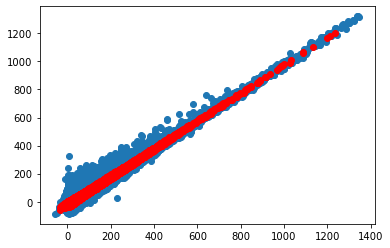

In [67]:
plt.scatter(trainwhoff.DEPARTURE_DELAY, trainwhoff.ARRIVAL_DELAY)
plt.scatter(test_w['DEPARTURE_DELAY'], yfit7, c='r')

In [68]:
pd.DataFrame(yfit7, columns=['ARRIVAL_DELAY']).to_csv('submit_sample8.csv', index_label='id')

In [69]:
X = train_fin[['DEPARTURE_DELAY','DISTANCE', 'AL_DELAY_MEAN', 'OR_DELAY_MEAN', 'DES_DELAY_MEAN', 'TAXI_OUT', 'WHEELS_OFF']].values
Y = train_fin["ARRIVAL_DELAY"].values

model.fit(X, Y)

xfit8 = test_fin[['DEPARTURE_DELAY','DISTANCE', 'AL_DELAY_MEAN', 'OR_DELAY_MEAN', 'DES_DELAY_MEAN', 'TAXI_OUT', 'WHEELS_OFF']].values

yfit8 = model.predict(xfit8)
yfit8

array([ 26.2739185 , -12.71207353,   0.97282285, ..., -14.70243474,
        -3.78137783,  -0.44913767])

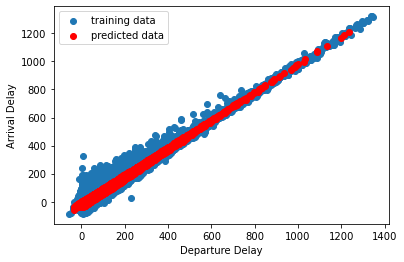

In [96]:
plt.scatter(trainwhoff.DEPARTURE_DELAY, trainwhoff.ARRIVAL_DELAY, label = 'training data')
plt.scatter(test_w['DEPARTURE_DELAY'], yfit8, c='r', label = 'predicted data')
plt.xlabel('Departure Delay')
plt.ylabel('Arrival Delay')
plt.legend()
plt.show()

In [71]:
pd.DataFrame(yfit8, columns=['ARRIVAL_DELAY']).to_csv('submit_sample9.csv', index_label='id')

In [72]:
X = train_fin[['DEPARTURE_DELAY','DISTANCE', 'AL_DELAY_MEAN', 'OR_DELAY_MEAN', 'DES_DELAY_MEAN', 'TAXI_OUT']].values
Y = train_fin["ARRIVAL_DELAY"].values

model.fit(X, Y)

xfit9 = test_fin[['DEPARTURE_DELAY','DISTANCE', 'AL_DELAY_MEAN', 'OR_DELAY_MEAN', 'DES_DELAY_MEAN', 'TAXI_OUT']].values

yfit9 = model.predict(xfit9)
yfit9

array([ 26.39126072, -12.59978417,   1.08870687, ..., -14.58840192,
        -3.66642525,  -0.33955395])

In [73]:
pd.DataFrame(yfit9, columns=['ARRIVAL_DELAY']).to_csv('submit_sample10.csv', index_label='id')

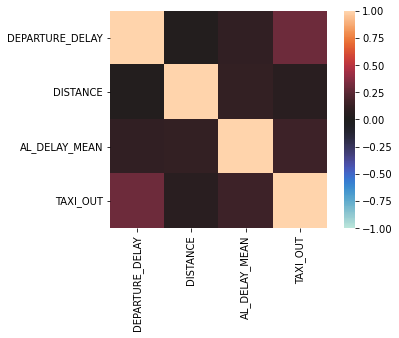

In [74]:
import seaborn as sns
corr = train_fin[['DEPARTURE_DELAY','DISTANCE', 'AL_DELAY_MEAN', 'TAXI_OUT']].corr()
sns.heatmap(corr, vmin=-1, vmax=1, center=0, square=True)

In [75]:
X = train_fin[['DEPARTURE_DELAY','DISTANCE', 'AL_DELAY_MEAN', 'OR_DELAY_MEAN', 'DES_DELAY_MEAN', 'TAXI_OUT', 'MONTH',
               'DAY', 'DAY_OF_WEEK', 'SCHEDULED_DEPARTURE', 'SCHEDULED_ARRIVAL']].values
Y = train_fin["ARRIVAL_DELAY"].values

model.fit(X, Y)

xfit10 = test_fin[['DEPARTURE_DELAY','DISTANCE', 'AL_DELAY_MEAN', 'OR_DELAY_MEAN', 'DES_DELAY_MEAN', 'TAXI_OUT',
                   'MONTH', 'DAY', 'DAY_OF_WEEK', 'SCHEDULED_DEPARTURE', 'SCHEDULED_ARRIVAL']].values

yfit10 = model.predict(xfit10)

pd.DataFrame(yfit10, columns=['ARRIVAL_DELAY']).to_csv('submit_sample11.csv', index_label='id')

In [76]:
train

,id,YEAR,MONTH,DAY,DAY_OF_WEEK,AIRLINE,FLIGHT_NUMBER,TAIL_NUMBER,ORIGIN_AIRPORT,DESTINATION_AIRPORT,SCHEDULED_DEPARTURE,DEPARTURE_TIME,TAXI_OUT,WHEELS_OFF,SCHEDULED_TIME,DISTANCE,SCHEDULED_ARRIVAL,ARRIVAL_DELAY
0,0,2015,1,1,4,AS,98,N407AS,ANC,SEA,5,2354.0,21.0,15.0,205.0,1448,430,-22.0
1,1,2015,1,1,4,AA,2336,N3KUAA,LAX,PBI,10,2.0,12.0,14.0,280.0,2330,750,-9.0
2,2,2015,1,1,4,US,840,N171US,SFO,CLT,20,18.0,16.0,34.0,286.0,2296,806,5.0
3,3,2015,1,1,4,AA,258,N3HYAA,LAX,MIA,20,15.0,15.0,30.0,285.0,2342,805,-9.0
4,4,2015,1,1,4,AS,135,N527AS,SEA,ANC,25,24.0,11.0,35.0,235.0,1448,320,-21.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2818548,2818548,2015,6,30,2,UA,1180,N65832,LAX,ORD,2359,2358.0,11.0,9.0,241.0,1744,600,-8.0
2818549,2818549,2015,6,30,2,UA,1192,N69839,LAX,IAH,2359,129.0,11.0,140.0,201.0,1379,520,79.0
2818550,2818550,2015,6,30,2,UA,1480,N37298,PDX,IAH,2359,152.0,8.0,200.0,249.0,1825,608,107.0
2818551,2818551,2015,6,30,2,UA,1637,N35260,SEA,IAH,2359,12.0,12.0,24.0,250.0,1874,609,9.0


In [77]:
train_airline1 = pd.concat([trainwhoff, test_w]).sort_values(by = 'AIRLINE').set_index('AIRLINE')

for l in airline:
    train_airline1.loc[l, 'AL_DELAY_MEAN'] = train_airline1.loc[l, 'ARRIVAL_DELAY'].mean()
    
train_or1 = train_airline1.sort_values(by = 'ORIGIN_AIRPORT').reset_index().set_index('ORIGIN_AIRPORT')

for a in airport:
    train_or1.loc[a, 'OR_DELAY_MEAN'] = train_or1.loc[a, 'ARRIVAL_DELAY'].mean()

train_des1 = train_or1.sort_values(by = 'DESTINATION_AIRPORT').reset_index().set_index('DESTINATION_AIRPORT')

for a in airport:
    train_des1.loc[a, 'DES_DELAY_MEAN'] = train_des1.loc[a, 'ARRIVAL_DELAY'].mean()

train_fin1 = train_des1.sort_values(by = 'id').reset_index().set_index('id', drop = False)
train_fin1.index.name = None
train_fin1

,DESTINATION_AIRPORT,ORIGIN_AIRPORT,AIRLINE,id,YEAR,MONTH,DAY,DAY_OF_WEEK,FLIGHT_NUMBER,TAIL_NUMBER,...,WHEELS_OFF,SCHEDULED_TIME,DISTANCE,SCHEDULED_ARRIVAL,ARRIVAL_DELAY,DEPARTURE_DELAY,PATH,AL_DELAY_MEAN,OR_DELAY_MEAN,DES_DELAY_MEAN
0,SEA,ANC,AS,0,2015,1,1,4,98,N407AS,...,15.0,205.0,1448,430,-22.0,10.0,ANC - SEA,-1.104695,-0.774214,1.326610
0,IAH,LAS,NK,0,2015,7,1,3,298,N624NK,...,52.0,177.0,1222,500,NaN,49.0,LAS - IAH,17.582256,7.036080,8.275869
1,PBI,LAX,AA,1,2015,1,1,4,2336,N3KUAA,...,14.0,280.0,2330,750,-9.0,4.0,LAX - PBI,6.379817,6.429186,6.654578
1,CLT,SFO,AA,1,2015,7,1,3,1965,N507AY,...,21.0,303.0,2296,808,NaN,16.0,SFO - CLT,6.379817,6.499687,2.585231
2,CLT,SFO,US,2,2015,1,1,4,840,N171US,...,34.0,286.0,2296,806,5.0,14.0,SFO - CLT,3.706209,6.499687,2.585231
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2818548,ORD,LAX,UA,2818548,2015,6,30,2,1180,N65832,...,9.0,241.0,1744,600,-8.0,10.0,LAX - ORD,7.915853,6.429186,10.505467
2818549,IAH,LAX,UA,2818549,2015,6,30,2,1192,N69839,...,140.0,201.0,1379,520,79.0,101.0,LAX - IAH,7.915853,6.429186,8.275869
2818550,IAH,PDX,UA,2818550,2015,6,30,2,1480,N37298,...,200.0,249.0,1825,608,107.0,121.0,PDX - IAH,7.915853,1.109842,8.275869
2818551,IAH,SEA,UA,2818551,2015,6,30,2,1637,N35260,...,24.0,250.0,1874,609,9.0,25.0,SEA - IAH,7.915853,2.141492,8.275869


In [78]:
test_finn1 = train_fin1[train_fin1.MONTH == 7]
train_finn1 = train_fin1[train_fin1.MONTH != 7]

In [79]:
X = train_finn1[['DEPARTURE_DELAY','DISTANCE', 'AL_DELAY_MEAN', 'OR_DELAY_MEAN', 'DES_DELAY_MEAN', 'TAXI_OUT']].values
Y = train_finn1["ARRIVAL_DELAY"].values

model.fit(X, Y)

xfit12 = test_finn1[['DEPARTURE_DELAY','DISTANCE', 'AL_DELAY_MEAN', 'OR_DELAY_MEAN', 'DES_DELAY_MEAN',
                   'TAXI_OUT']].values

yfit12 = model.predict(xfit12)

pd.DataFrame(yfit12, columns=['ARRIVAL_DELAY']).to_csv('submit_sample13.csv', index_label='id')

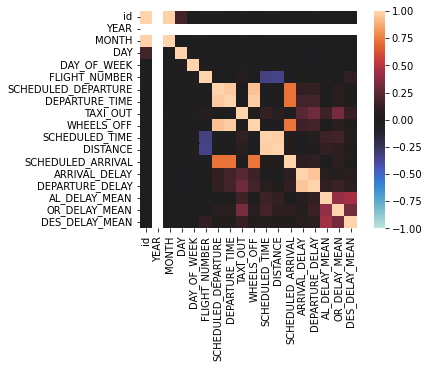

In [80]:
corr = train_fin.corr()
sns.heatmap(corr, vmin=-1, vmax=1, center=0, square=True)

In [81]:
X = train_fin[['DEPARTURE_DELAY','DISTANCE', 'AL_DELAY_MEAN', 'TAXI_OUT']].values
Y = train_fin["ARRIVAL_DELAY"].values

model.fit(X, Y)

xfit11 = test_fin[['DEPARTURE_DELAY','DISTANCE', 'AL_DELAY_MEAN', 'TAXI_OUT']].values

yfit11 = model.predict(xfit11)

pd.DataFrame(yfit11, columns=['ARRIVAL_DELAY']).to_csv('submit_sample12.csv', index_label='id')

In [82]:
from sklearn.metrics import mean_squared_error

mean_squared_error(Y, model.predict(X), squared=False)

10.909798936321886